<a href="https://colab.research.google.com/github/guilpassos/Fuctura_Data_Science/blob/main/Regress%C3%A3o_Linear_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sobre os dados**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [24]:
dados = pd.read_csv('/content/BankChurners.csv.zip')

In [25]:
dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [26]:
dados.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [27]:
dados.shape

(10127, 23)

In [28]:
dados.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [29]:

#df_ = pd.DataFrame(dados)

In [30]:
dados.describe

<bound method NDFrame.describe of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Inco

## **Covariancia**

In [31]:
dados.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267


In [32]:
dados.cov()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.361889e+15,2.252209e+06,324600.732489,3.966693e+07,396204.467439,213649.963677,232468.710101,1.914395e+09,2.479788e+07,1.889597e+09,140510.302192,-2.468689e+09,-2.564908e+06,67615.462278,2705.892478,-625659.593126,625659.164720
Customer_Age,2.252209e+06,6.426931e+01,-1.273041,5.051060e+01,-0.136216,0.440431,-0.163638,1.804254e+02,9.656595e+01,8.385949e+01,-0.109029,-1.264931e+03,-1.262597e+01,-0.023176,0.015724,0.053266,-0.053266
Dependent_count,3.246007e+05,-1.273041e+00,1.687163,-1.069129e+00,-0.078897,-0.014135,-0.058201,8.035358e+02,-2.845655e+00,8.063815e+02,-0.010091,1.105180e+02,1.521767e+00,0.003429,-0.013298,0.009105,-0.009105
Months_on_book,3.966693e+07,5.051060e+01,-1.069129,6.378285e+01,-0.114248,0.598592,-0.095190,5.449094e+02,5.612435e+01,4.887851e+02,-0.085712,-1.046998e+03,-9.339171e+00,-0.026757,-0.016603,0.039950,-0.039950
Total_Relationship_Count,3.962045e+05,-1.362164e-01,-0.078897,-1.142484e-01,2.416184,-0.005774,0.094923,-1.008515e+03,1.738822e+01,-1.025903e+03,0.017077,-1.833551e+03,-8.825617e+00,0.015111,0.028996,-0.085163,0.085163
Months_Inactive_12_mon,2.136500e+05,4.404313e-01,-0.014135,5.985924e-01,-0.005774,1.021358,0.032972,-1.873235e+02,-3.476571e+01,-1.525578e+02,-0.007144,-1.269686e+02,-1.014990e+00,-0.009381,-0.002090,0.056652,-0.056652
Contacts_Count_12_mon,2.324687e+05,-1.636385e-01,-0.058201,-9.519009e-02,0.094923,0.032972,1.223734,2.092991e+02,-4.860553e+01,2.579046e+02,-0.005928,-4.238033e+02,-3.952345e+00,-0.025020,-0.016917,0.083154,-0.083154
Credit_Limit,1.914395e+09,1.804254e+02,803.535812,5.449094e+02,-1008.514979,-187.323526,209.299091,8.260586e+07,3.147529e+05,8.229111e+07,25.526689,5.302297e+06,1.619802e+04,-4.370776,-1210.164705,-79.196656,79.196887
Total_Revolving_Bal,2.479788e+07,9.656595e+01,-2.845655,5.612435e+01,17.388217,-34.765710,-48.605534,3.147529e+05,6.642044e+05,-3.494515e+05,10.392768,1.782172e+05,1.072429e+03,17.436374,140.208416,-78.308907,78.308902
Avg_Open_To_Buy,1.889597e+09,8.385949e+01,806.381467,4.887851e+02,-1025.903197,-152.557816,257.904625,8.229111e+07,-3.494515e+05,8.264056e+07,15.133920,5.124080e+06,1.512559e+04,-21.807150,-1350.373120,-0.887749,0.887985


In [33]:
dados.corr().round(4)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.0000,0.0076,0.0068,0.1346,0.0069,0.0057,0.0057,0.0057,0.0008,0.0056,0.0174,-0.0197,-0.0030,0.0077,0.0003,-0.0464,0.0464
Customer_Age,0.0076,1.0000,-0.1223,0.7889,-0.0109,0.0544,-0.0185,0.0025,0.0148,0.0012,-0.0620,-0.0464,-0.0671,-0.0121,0.0071,0.0182,-0.0182
Dependent_count,0.0068,-0.1223,1.0000,-0.1031,-0.0391,-0.0108,-0.0405,0.0681,-0.0027,0.0683,-0.0354,0.0250,0.0499,0.0111,-0.0371,0.0192,-0.0192
Months_on_book,0.1346,0.7889,-0.1031,1.0000,-0.0092,0.0742,-0.0108,0.0075,0.0086,0.0067,-0.0490,-0.0386,-0.0498,-0.0141,-0.0075,0.0137,-0.0137
Total_Relationship_Count,0.0069,-0.0109,-0.0391,-0.0092,1.0000,-0.0037,0.0552,-0.0714,0.0137,-0.0726,0.0501,-0.3472,-0.2419,0.0408,0.0677,-0.1500,0.1500
Months_Inactive_12_mon,0.0057,0.0544,-0.0108,0.0742,-0.0037,1.0000,0.0295,-0.0204,-0.0422,-0.0166,-0.0322,-0.0370,-0.0428,-0.0390,-0.0075,0.1535,-0.1535
Contacts_Count_12_mon,0.0057,-0.0185,-0.0405,-0.0108,0.0552,0.0295,1.0000,0.0208,-0.0539,0.0256,-0.0244,-0.1128,-0.1522,-0.0950,-0.0555,0.2058,-0.2058
Credit_Limit,0.0057,0.0025,0.0681,0.0075,-0.0714,-0.0204,0.0208,1.0000,0.0425,0.9960,0.0128,0.1717,0.0759,-0.0020,-0.4830,-0.0239,0.0239
Total_Revolving_Bal,0.0008,0.0148,-0.0027,0.0086,0.0137,-0.0422,-0.0539,0.0425,1.0000,-0.0472,0.0582,0.0644,0.0561,0.0899,0.6240,-0.2630,0.2630
Avg_Open_To_Buy,0.0056,0.0012,0.0683,0.0067,-0.0726,-0.0166,0.0256,0.9960,-0.0472,1.0000,0.0076,0.1659,0.0709,-0.0101,-0.5388,-0.0003,0.0003


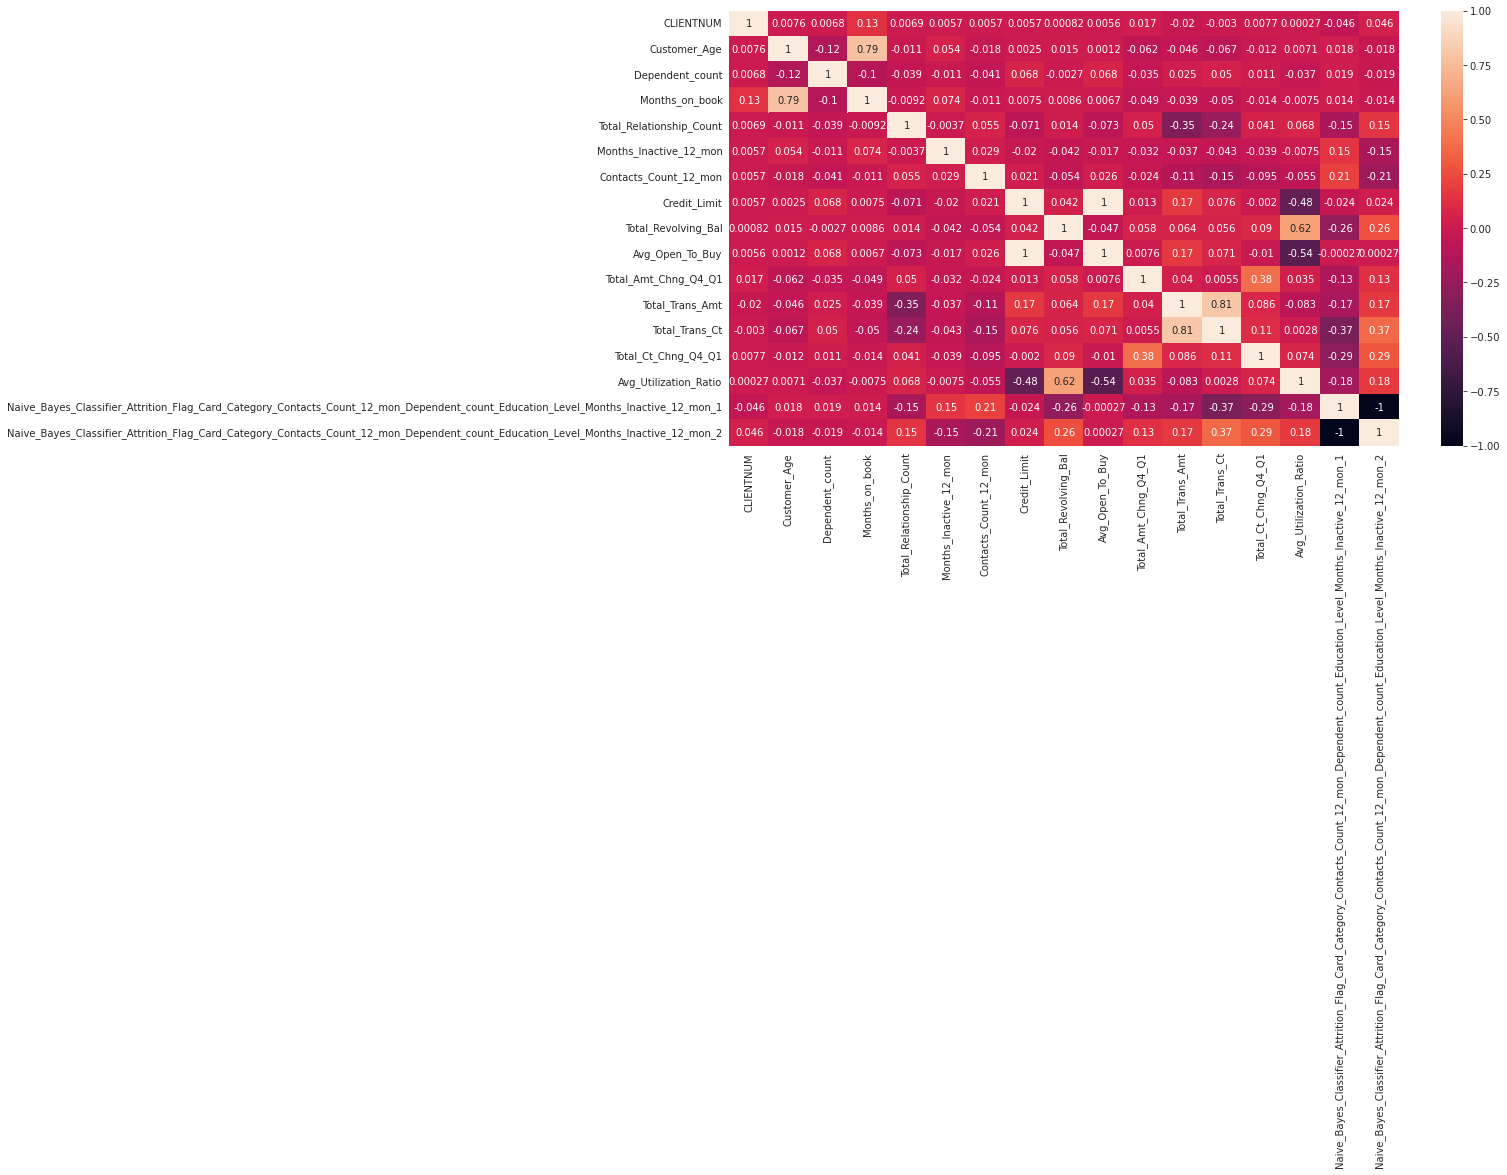

In [34]:
ax = sns.heatmap(dados.corr(), annot=True)
sns.color_palette("pastel")
ax.figure.set_size_inches(15, 8)

## **Comportamento da Variável Dependente(y)**

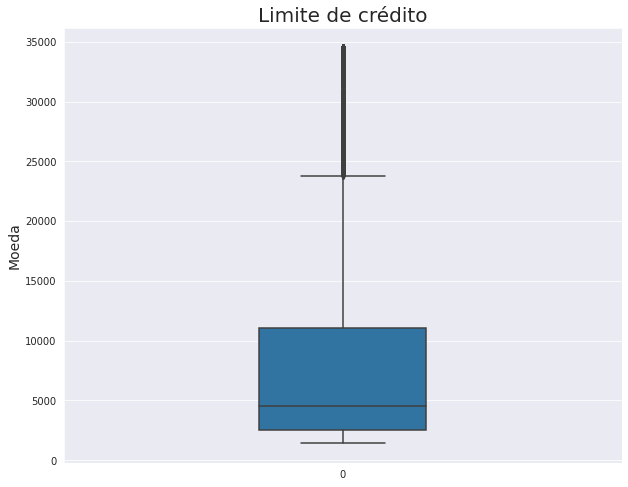

In [35]:
ax = sns.boxplot(data=dados['Credit_Limit'], orient='v', width=0.3)
ax.figure.set_size_inches(10, 8)
ax.set_title('Limite de crédito', fontsize=20)
ax.set_ylabel('Moeda', fontsize=14)
ax

## **Variável Dependente x Variáveis Explicativas**

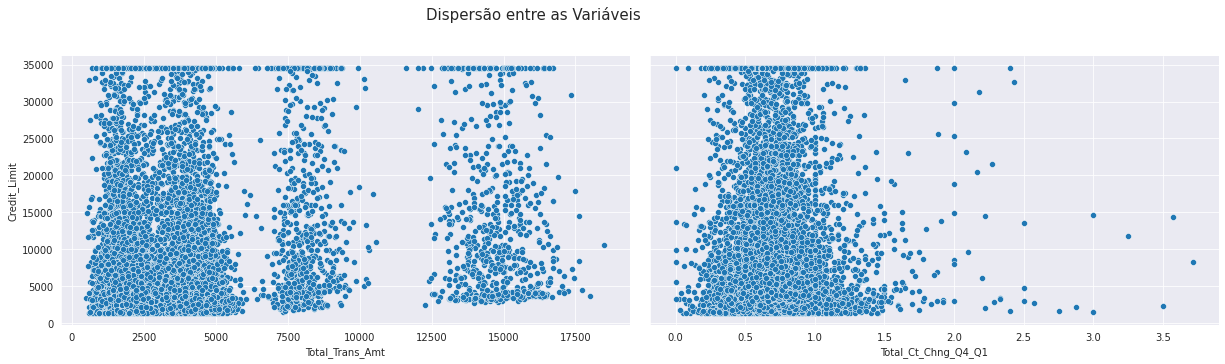

In [36]:
ax = sns.pairplot(dados, y_vars='Credit_Limit', x_vars=['Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=15, y=1.10)
sns.color_palette("husl", 8)
ax.figure.set_size_inches(20, 5)
ax